#Problem Statement:

A scientist is interested in exploring the variables of this dataset and building a machine-learning
model which accurately classifies tumors as Benign or Malignant based on the tumor shape and
its geometry. You can get data and data description in the following link https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic. Write a scientific report
for that scientist after analyzing this data.

#Dataset Description

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators:

	Dr. William H. Wolberg, General Surgery Dept., University of Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian Nuclear feature extraction for breast tumor diagnosis.IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.

Medical literature:

	W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer fromfine-needle aspirates.  Cancer Letters 77 (1994) 163-171.

	W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Image analysis and machine learning applied to breast cancer diagnosis and prognosis.  Analytical and Quantitative Cytology and Histology, Vol. 17
	No. 2, pages 77-87, April 1995.

	W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian. Computerized breast cancer diagnosis and prognosis from fine needle aspirates.  
	Archives of Surgery 1995;130:511-516.

	W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian.  Computer-derived nuclear features distinguish malignant from benign breast cytology.  Human Pathology, 26:792--796, 1995.

See also:
	http://www.cs.wisc.edu/~olvi/uwmp/mpml.html
	http://www.cs.wisc.edu/~olvi/uwmp/cancer.html

Results:

	- predicting field 2, diagnosis: B = benign, M = malignant
	- sets are linearly separable using all 30 input features
	- best predictive accuracy obtained using one separating plane
		in the 3-D space of Worst Area, Worst Smoothness and Mean Texture.  Estimated accuracy 97.5% using repeated 10-fold crossvalidations.  Classifier has correctly
		diagnosed 176 consecutive new patients as of November 1995.

4. Relevant information

	Features are computed from a digitized image of a fine needle aspirate (FNA of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

	Separating plane described above was obtained using Multisurface Method-Tree(MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming.Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree.  Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

	The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


	This database is also available through the UW CS ftp server:

	ftp ftp.cs.wisc.edu
	cd math-prog/cpo-dataset/machine-learn/WDBC/

5. Number of instances: 569

6. Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

7. Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed.

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

8. Missing attribute values: none

9. Class distribution: 357 benign, 212 malignant

# A clear scintific report for this problem statement

In [46]:
################################################ importing relavent python libraries ##########################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [47]:
################################################# Read the dataset using the dataset url ##################################

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ["id", "diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
df = pd.read_csv(url, header=None, names=columns)


In [48]:
df.head(5)

,id,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          569 non-null    int64  
 1   diagnosis   569 non-null    object 
 2   feature_1   569 non-null    float64
 3   feature_2   569 non-null    float64
 4   feature_3   569 non-null    float64
 5   feature_4   569 non-null    float64
 6   feature_5   569 non-null    float64
 7   feature_6   569 non-null    float64
 8   feature_7   569 non-null    float64
 9   feature_8   569 non-null    float64
 10  feature_9   569 non-null    float64
 11  feature_10  569 non-null    float64
 12  feature_11  569 non-null    float64
 13  feature_12  569 non-null    float64
 14  feature_13  569 non-null    float64
 15  feature_14  569 non-null    float64
 16  feature_15  569 non-null    float64
 17  feature_16  569 non-null    float64
 18  feature_17  569 non-null    float64
 19  feature_18  569 non-null    f

In [50]:
 ############################################## Drop 'id' column as it is unnecessary for this dataset ######################################

df.drop("id", axis=1, inplace=True)


In [51]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [52]:
####################################################### covert the value of column "diagnosis" to binary.B as 0 and M as 1

df["diagnosis"] = df["diagnosis"].map({"B": 0, "M": 1})

In [53]:
df.head(5)

,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
######################################################## Features as x and level as y #################################

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]



In [55]:
X

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [56]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [57]:
############################################################ Train test split ##########################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)


In [58]:
X_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,0.05718,...,15.15,31.82,99.00,698.8,0.1162,0.17110,0.22820,0.12820,0.2871,0.06917
113,10.510,20.19,68.64,334.2,0.11220,0.13030,0.064760,0.030680,0.1922,0.07782,...,11.16,22.75,72.62,374.4,0.1300,0.20490,0.12950,0.06136,0.2383,0.09026
452,12.000,28.23,76.77,442.5,0.08437,0.06450,0.040550,0.019450,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.1208,0.18560,0.18110,0.07116,0.2447,0.08194
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.037360,0.1454,0.06147,...,15.48,27.27,105.90,733.5,0.1026,0.31710,0.36620,0.11050,0.2258,0.08004
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.014790,0.005769,0.1680,0.06412,...,11.15,24.62,71.11,380.2,0.1388,0.12550,0.06409,0.02500,0.3057,0.07875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,11.410,10.82,73.34,403.3,0.09373,0.06685,0.035120,0.026230,0.1667,0.06113,...,12.82,15.97,83.74,510.5,0.1548,0.23900,0.21020,0.08958,0.3016,0.08523
84,12.000,15.65,76.95,443.3,0.09723,0.07165,0.041510,0.018630,0.2079,0.05968,...,13.67,24.90,87.78,567.9,0.1377,0.20030,0.22670,0.07632,0.3379,0.07924
96,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
173,11.080,14.71,70.21,372.7,0.10060,0.05743,0.023630,0.025830,0.1566,0.06669,...,11.35,16.82,72.01,396.5,0.1216,0.08240,0.03938,0.04306,0.1902,0.07313


In [59]:
############################################################ Standardization on Features ################################
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
################################################# Create and train a logistic regression model #########################
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


################################################ Predictions on the test set ############################################
y_pred = model.predict(X_test_scaled)

################################################ Evaluate the model through confusion matrix #######################################################
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[74  1]
 [ 0 39]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



First of all, The results presented are for the evaluation of a Logistic Regression model on a binary classification task. The model's performance metrics indicate how well it predicts the two classes (0 and 1) in the dataset.

**Confusion Matrix:**

True Negative (TN): 74
False Positive (FP): 1
False Negative (FN): 0
True Positive (TP): 39

The confusion matrix reveals that the model has predicted 74 instances correctly as class 0 (True Negatives) and 39 instances correctly as class 1 (True Positives). It made only 1 incorrect prediction where it classified an instance as class 1 when it was actually class 0 (False Positive).

**Classification Report:**

**Precision:** Precision is the ratio of true positive predictions to the total instances predicted as positive (TP / (TP + FP)). For class 0, the precision is 1.00 (perfect), and for class 1, it's 0.97 (high), indicating that the model's positive predictions are accurate.

**Recall:** Recall is the ratio of true positive predictions to the total actual positive instances (TP / (TP + FN)). For both classes, recall is high (1.00 for class 1 and 0.99 for class 0), suggesting that the model effectively captures the majority of positive instances.

**F1-Score:** The F1-score is the harmonic mean of precision and recall. It provides a balanced assessment of a model's performance. For both classes, the F1-scores are high (0.99), indicating a good balance between precision and recall.

**Support:** The support value indicates the number of actual instances in each class. For class 0, there are 75 instances, and for class 1, there are 39 instances.

**Accuracy:** The overall accuracy of the model is 0.99, which means it correctly predicted the class for 99% of the instances.

**In conclusion**, the Logistic Regression model demonstrates outstanding performance on this dataset. It achieves near-perfect accuracy, with highly accurate predictions for both classes (0 and 1). The model's precision, recall, and F1-scores are excellent, indicating its effectiveness in classifying instances from the dataset.

In [61]:
##################################################################### Standardize the features #################################################
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [62]:
########################################################## compare Classifiers ##################################################
classifiers = [
("Logistic Regression", LogisticRegression()),
("Support Vector Machine", SVC()),
("K-Nearest Neighbors", KNeighborsClassifier()),
("Decision Tree", DecisionTreeClassifier()),
("Random Forest", RandomForestClassifier())
]

In [63]:
######################################################### Iterate over classifiers and compare their performance ########################################
results = []
for name, classifier in classifiers:
  print(f"Training and evaluating {name}...")
  classifier.fit(X_train_scaled, y_train)
  y_pred = classifier.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  results.append((name, accuracy))
  print("Accuracy:", accuracy)
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
  print("\nClassification Report:\n", classification_report(y_test, y_pred))
  print("-" * 50)


Training and evaluating Logistic Regression...
Accuracy: 0.9912280701754386
Confusion Matrix:
 [[74  1]
 [ 0 39]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

--------------------------------------------------
Training and evaluating Support Vector Machine...
Accuracy: 0.9912280701754386
Confusion Matrix:
 [[74  1]
 [ 0 39]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

--------------

The given results display the performance of various machine learning algorithms on a binary classification task. The algorithms evaluated are Logistic Regression, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Decision Tree, and Random Forest.

**Overall**, the models demonstrate high accuracy in classifying instances into their respective classes. The Logistic Regression and SVM models achieve the highest accuracy of approximately 99.12%, as indicated by identical confusion matrices and classification reports. These models exhibit exceptional precision, recall, and F1-scores for both classes (0 and 1), highlighting their ability to effectively discriminate between the classes.

**The KNN model**, while achieving a respectable accuracy of 96.49%, shows slightly lower performance compared to the previous two models. It has a minor trade-off between precision and recall for class 1, suggesting a slight bias towards class 0.

**The Decision Tree model** performs well with an accuracy of 93.86%. It demonstrates solid precision and recall for both classes. However, a marginally lower F1-score for class 1 implies some difficulty in correctly identifying instances of that class.

Lastly, the **Random Forest** model also exhibits an accuracy of 96.49%, on par with the KNN model. It delivers balanced precision and recall values for both classes, which are reflected in its comparable F1-scores.

In summary, the evaluation indicates that Logistic Regression and SVM stand out with the highest accuracy and well-rounded classification metrics. KNN, Decision Tree, and Random Forest also perform well but exhibit some variations in precision and recall.

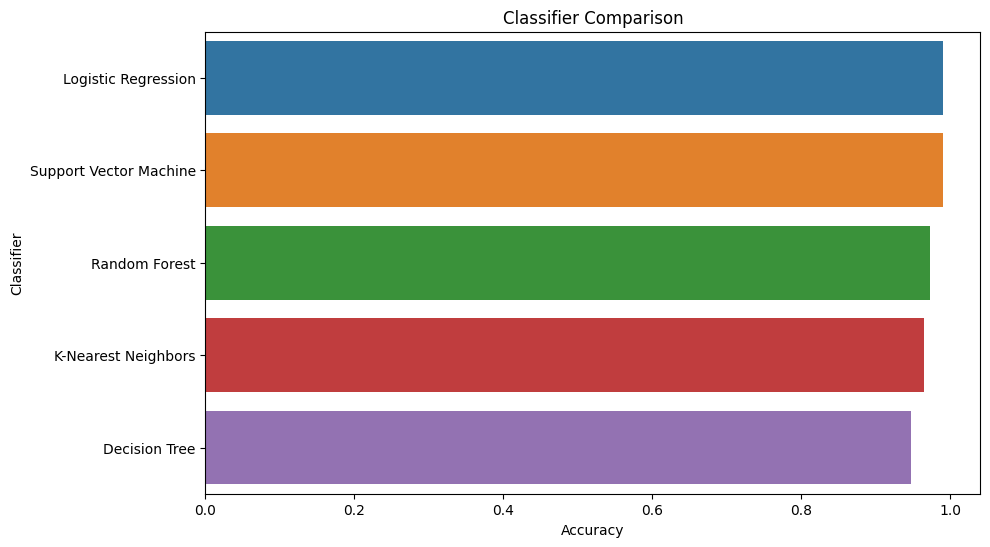

In [64]:
###################################################### Create a bar plot to compare classifier accuracies ########################################
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Classifier', data=results_df.sort_values(by='Accuracy', ascending=False))
plt.title('Classifier Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.show()


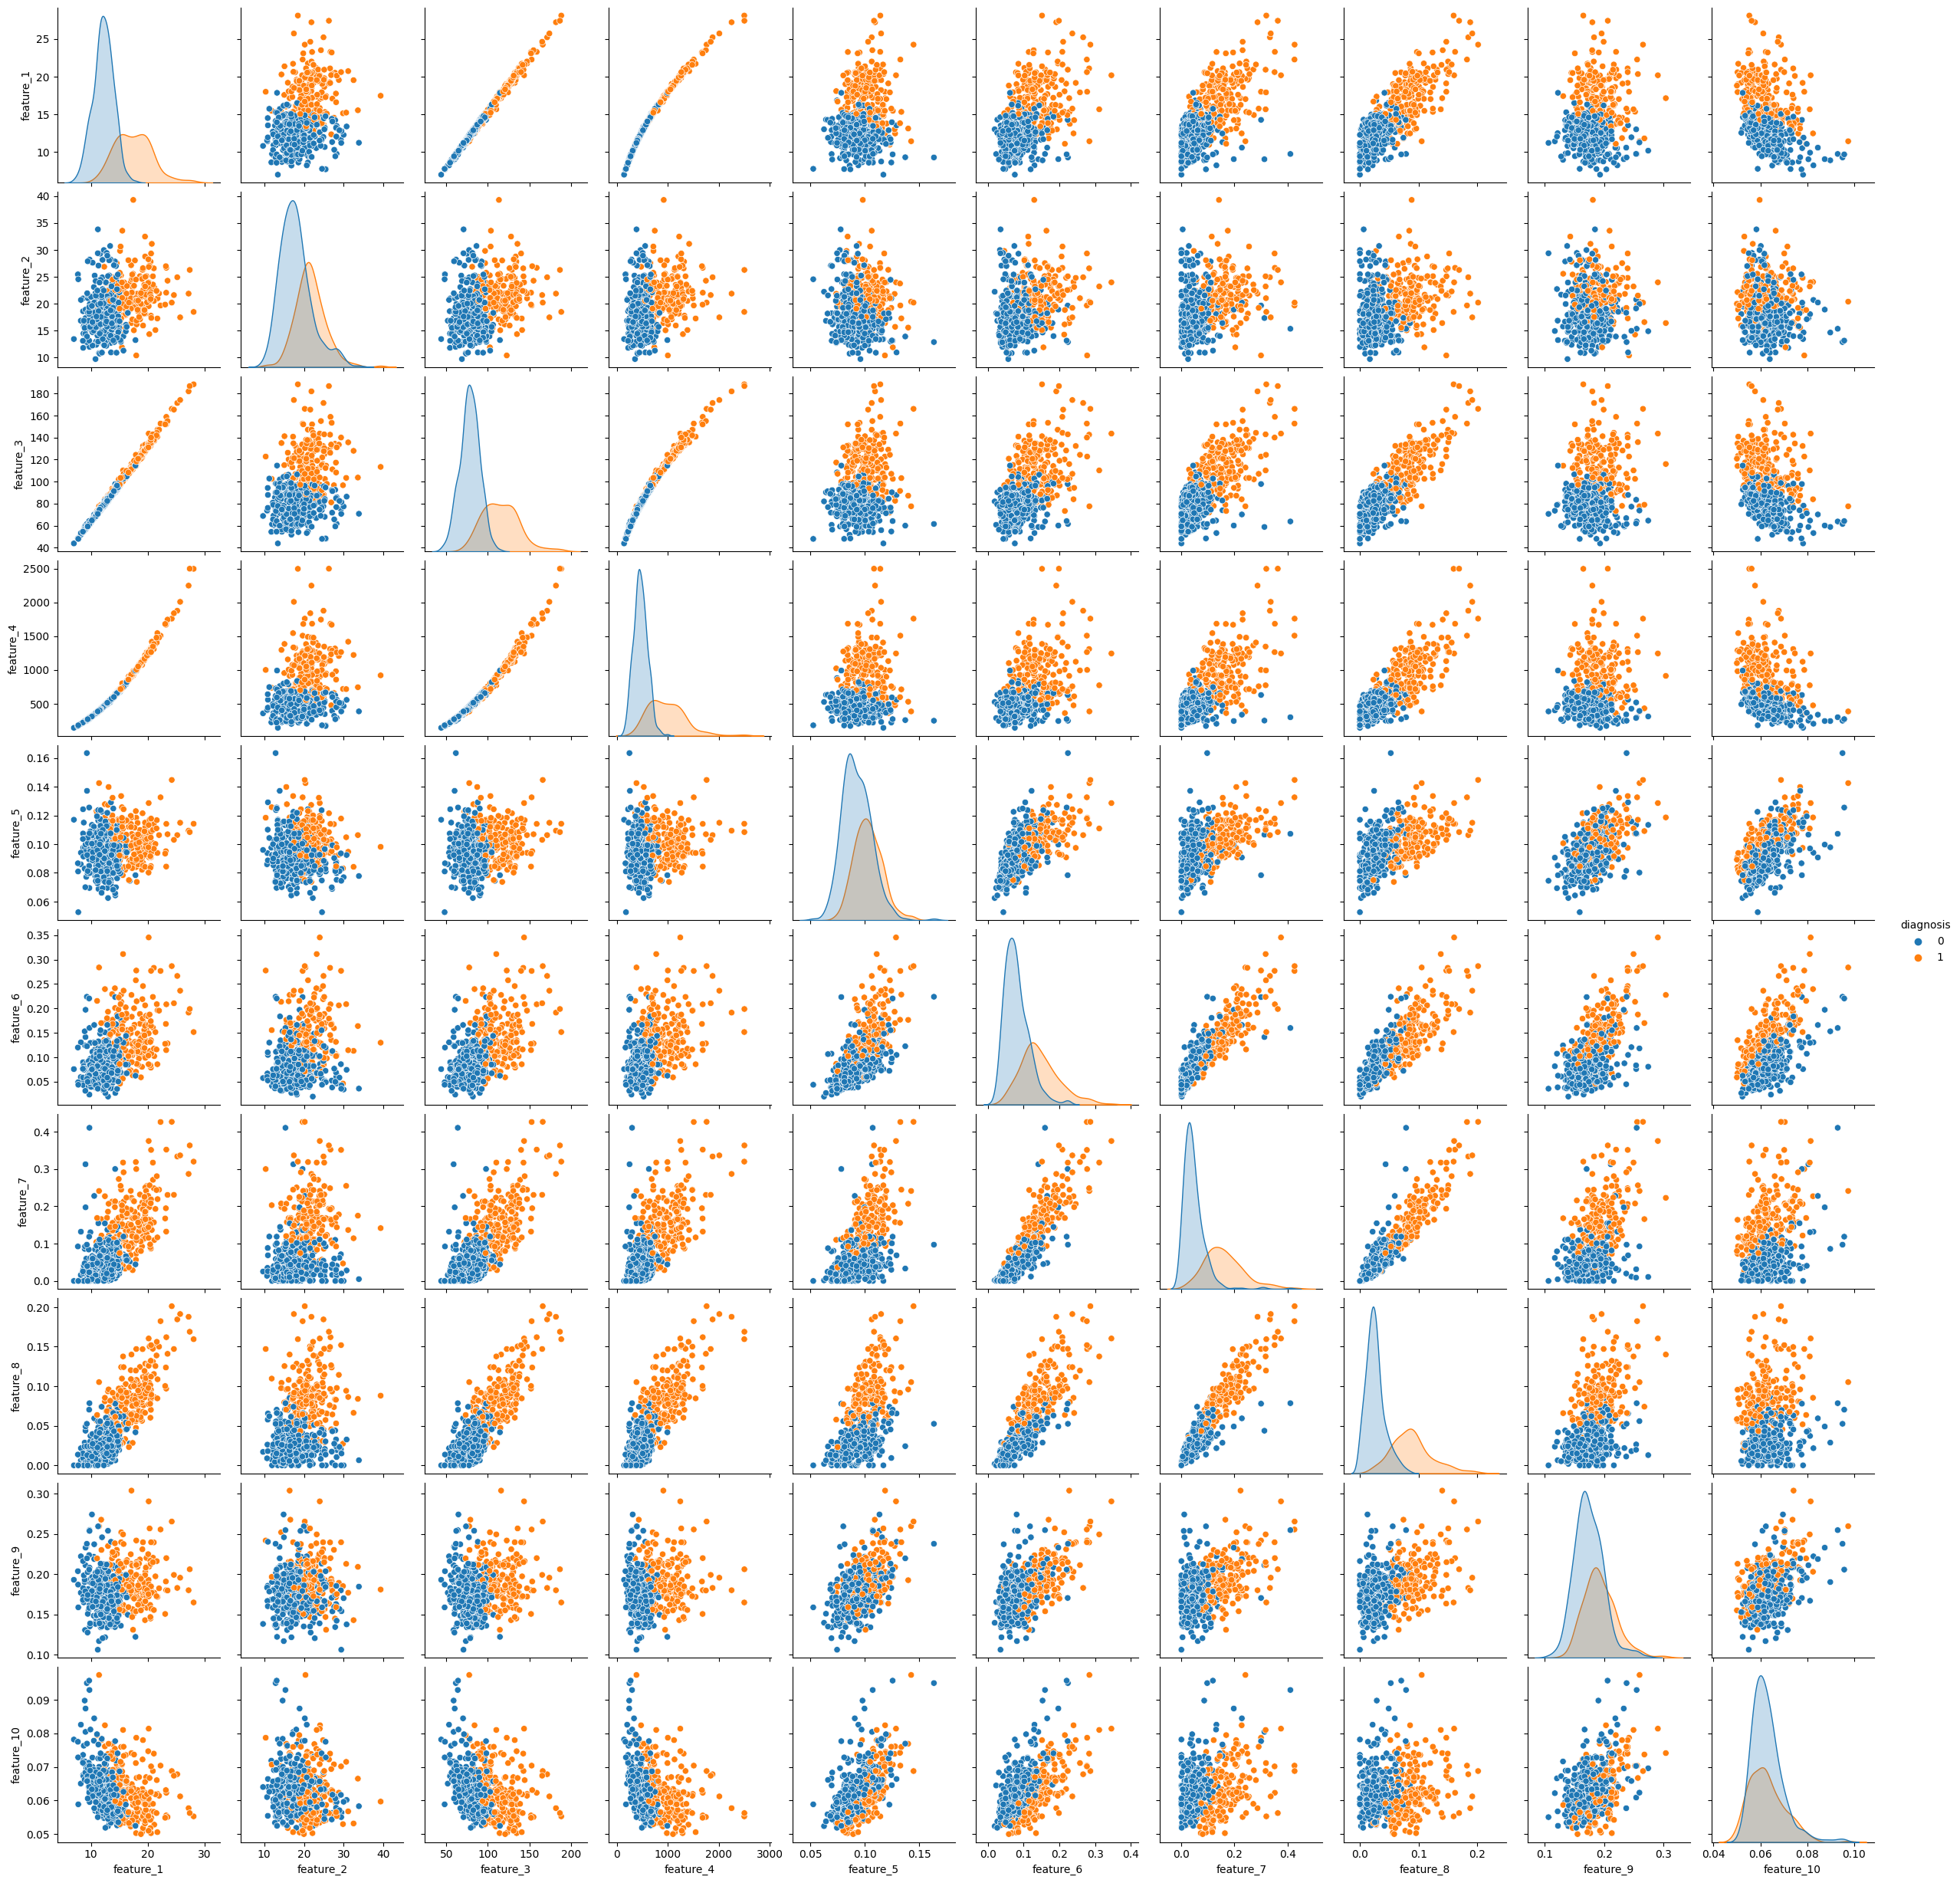

In [43]:
############################################# pair plots to visualize relationships between features ##############################

sns.pairplot(df, hue="diagnosis", vars=[f"feature_{i}" for i in range(1, 11)])
plt.show()


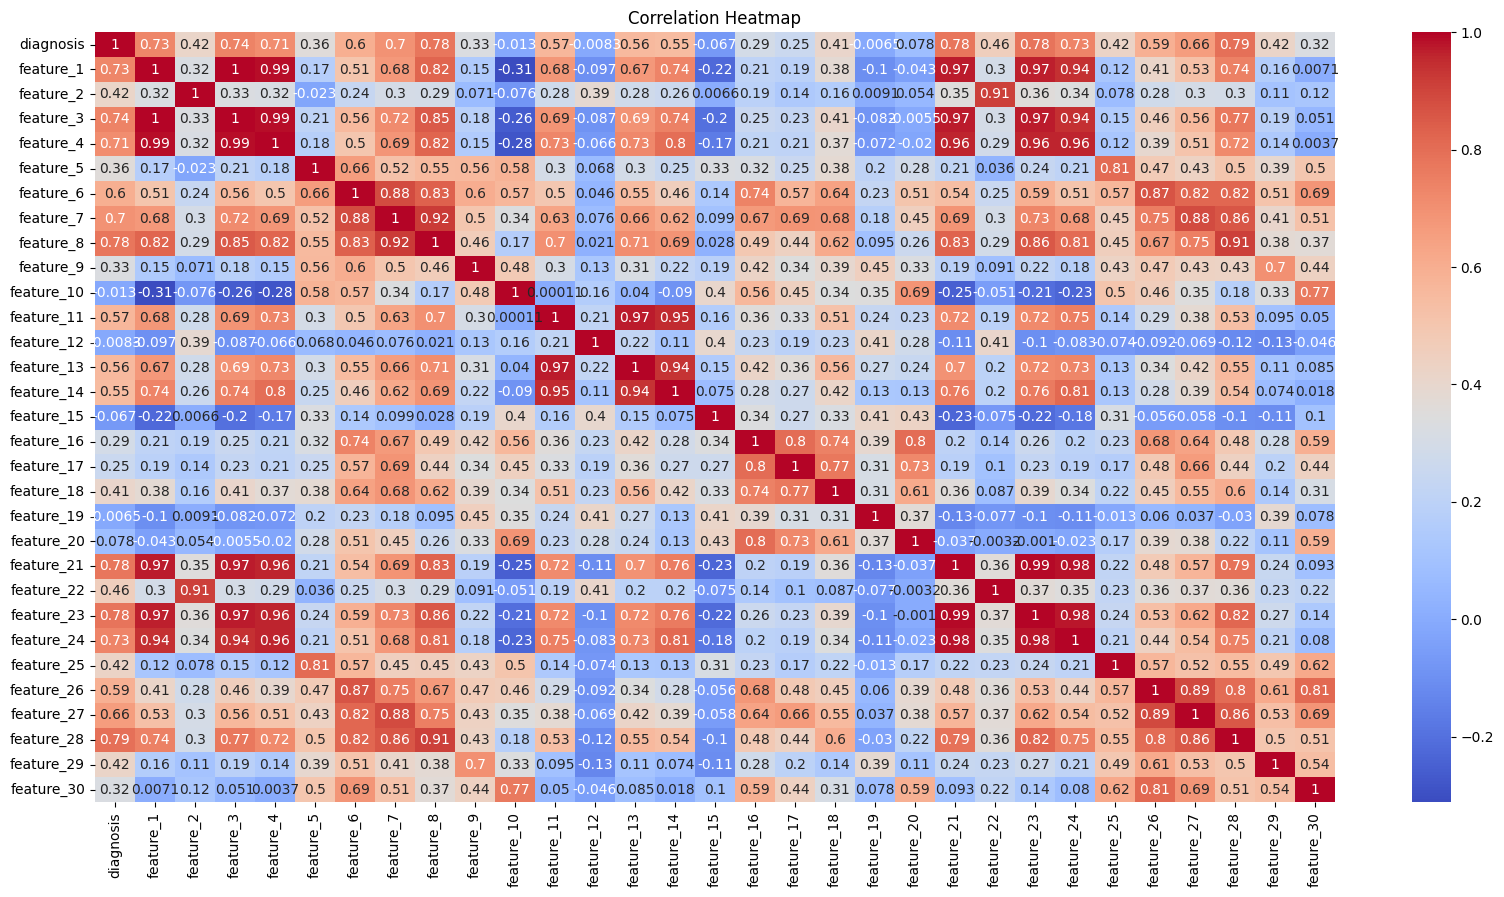

In [44]:
########################################################## Correlation Heatmap ################################################
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

([<matplotlib.axis.XTick at 0x784e4f1f4370>,
 [Text(0, 0, 'feature_1'),
  Text(1, 0, 'feature_2'),
  Text(2, 0, 'feature_3'),
  Text(3, 0, 'feature_4'),
  Text(4, 0, 'feature_5'),
  Text(5, 0, 'feature_6'),
  Text(6, 0, 'feature_7'),
  Text(7, 0, 'feature_8'),
  Text(8, 0, 'feature_9'),
  Text(9, 0, 'feature_10'),
  Text(10, 0, 'feature_11'),
  Text(11, 0, 'feature_12'),
  Text(12, 0, 'feature_13'),
  Text(13, 0, 'feature_14'),
  Text(14, 0, 'feature_15'),
  Text(15, 0, 'feature_16'),
  Text(16, 0, 'feature_17'),
  Text(17, 0, 'feature_18'),
  Text(18, 0, 'feature_19'),
  Text(19, 0, 'feature_20'),
  Text(20, 0, 'feature_21'),
  Text(21, 0, 'feature_22'),
  Text(22, 0, 'feature_23'),
  Text(23, 0, 'feature_24'),
  Text(24, 0, 'feature_25'),
  Text(25, 0, 'feature_26'),
  Text(26, 0, 'feature_27'),
  Text(27, 0, 'feature_28'),
  Text(28, 0, 'feature_29'),
  Text(29, 0, 'feature_30')])

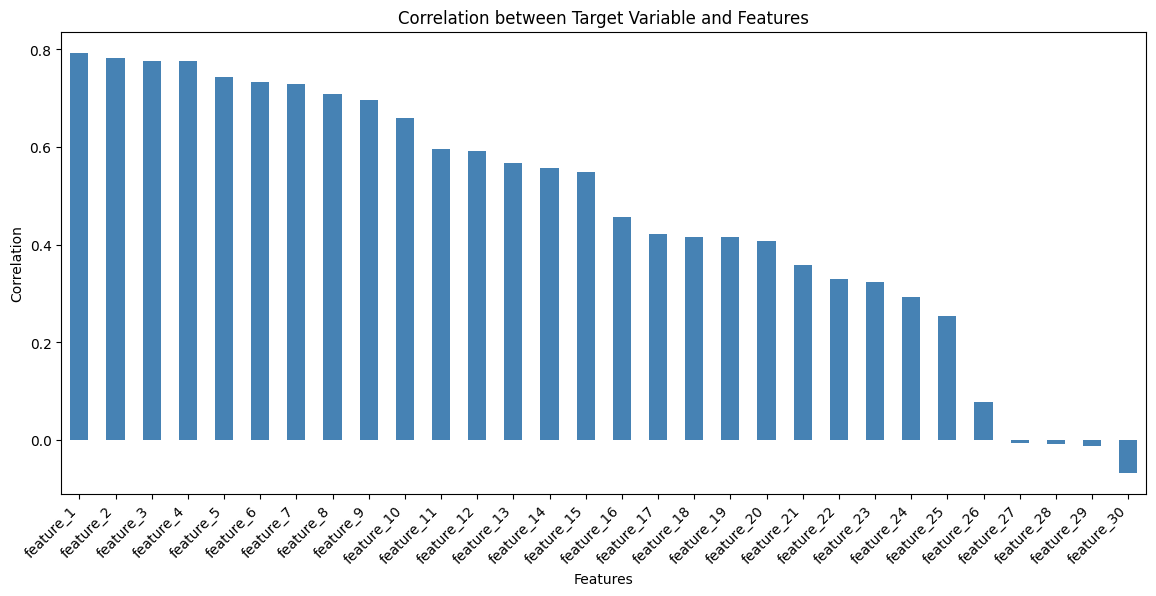

In [45]:
#################################### bar charts to show relationships between target variable and other features ###########################
plt.figure(figsize=(14, 6))
correlation_with_target = df.drop("diagnosis", axis=1).corrwith(df["diagnosis"]).sort_values(ascending=False)
correlation_with_target.plot(kind='bar', color='steelblue')
plt.title('Correlation between Target Variable and Features')
plt.xlabel('Features')
plt.ylabel('Correlation')
############################################################ Set the x-axis labels to the original variable names##########################
plt.xticks(range(len(correlation_with_target.index)), df.drop("diagnosis", axis=1).columns, rotation=45, ha='right')

***In conclusion***, both Logistic Regression
and Support Vector Machine models stood out as the top performers, achieving impressive accuracy scores of 99.12%. Therefore, both these models 99.12% accurately classifies tumors as Benign or Malignant based on the tumor shape and its geometry.